# World Happiness Report

Problem Statement:
Context

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

You need to predict the happiness score considering all the other factors mentioned in the dataset. 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [77]:
data=pd.read_csv("worldhappiness.csv")

In [78]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [7]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [53]:
data.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [9]:
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [8]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [79]:
data.columns=['Country', 'Region', 'Happiness Rank', 'Happiness Score','Standard Error', 'Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)','Generosity', 'Dystopia Residual']

In [73]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [80]:
mapping = {data.columns[0]:'country', data.columns[1]: 'region', data.columns[2]:'happiness_rank', data.columns[3]: 'happiness_score',data.columns[4]:'standard_error', data.columns[5]: 'gdp',data.columns[6]:'family', data.columns[7]: 'health',data.columns[8]:'freedom',data.columns[9]: 'corruption',data.columns[10]: 'generosity',data.columns[11]: 'dystopia_resudial'}
data = data.rename(columns=mapping)

In [81]:
data.columns

Index(['country', 'region', 'happiness_rank', 'happiness_score',
       'standard_error', 'gdp', 'family', 'health', 'freedom', 'corruption',
       'generosity', 'dystopia_resudial'],
      dtype='object')

In [82]:
data.head()    

,country,region,happiness_rank,happiness_score,standard_error,gdp,family,health,freedom,corruption,generosity,dystopia_resudial
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [88]:
sns.set_style("darkgrid")
plt.rcParams["font.size"]=15
plt.rcParams["figure.figsize"]=(10,7)
plt.rcParams["figure.facecolor"]="#FFE5B4"

Text(0, 0.5, 'GDP')

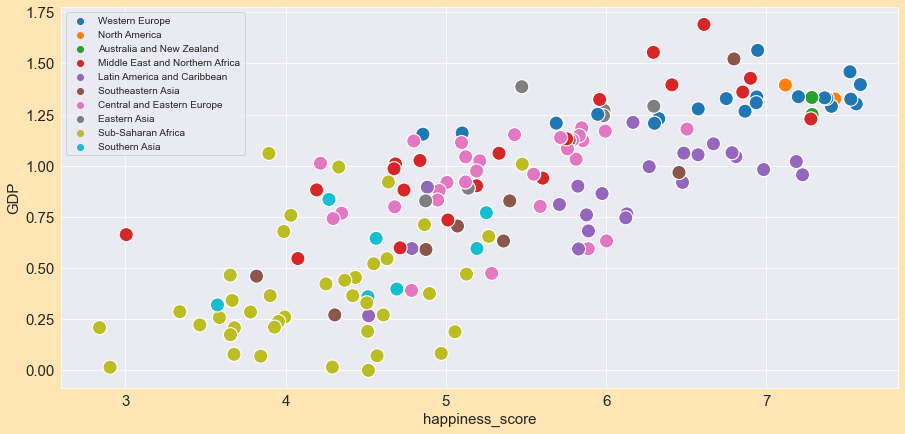

In [89]:
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=data.happiness_score,y=data.gdp,hue=data.region,s=200)
plt.legend(loc="upper left", fontsize="10")
plt.xlabel("happiness_score")
plt.ylabel("GDP")

In [95]:
gdp_region=data.groupby("region").["gdp"].sum()
gdp_region

AttributeError: 'DataFrameGroupBy' object has no attribute 'orderby'

Text(0, 0.5, '')

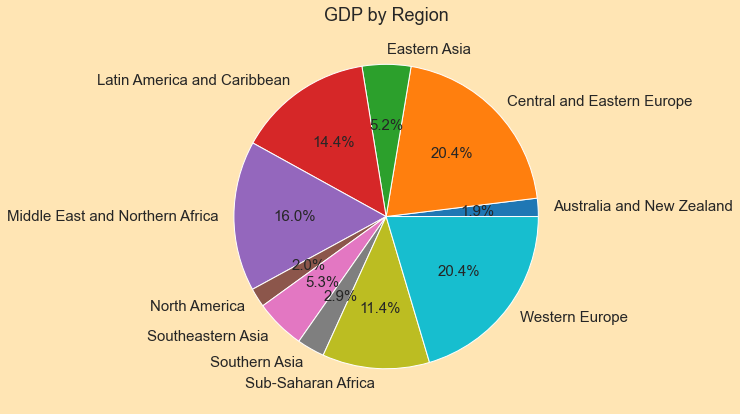

In [94]:
gdp_region.plot.pie(autopct="%1.1f%%")
plt.title("GDP by Region")
plt.ylabel("")

In [97]:
total_country=data.groupby("region")[["country"]].count()
print(total_country)
                                      

                                 country
region                                  
Australia and New Zealand              2
Central and Eastern Europe            29
Eastern Asia                           6
Latin America and Caribbean           22
Middle East and Northern Africa       20
North America                          2
Southeastern Asia                      9
Southern Asia                          7
Sub-Saharan Africa                    40
Western Europe                        21


<AxesSubplot:>

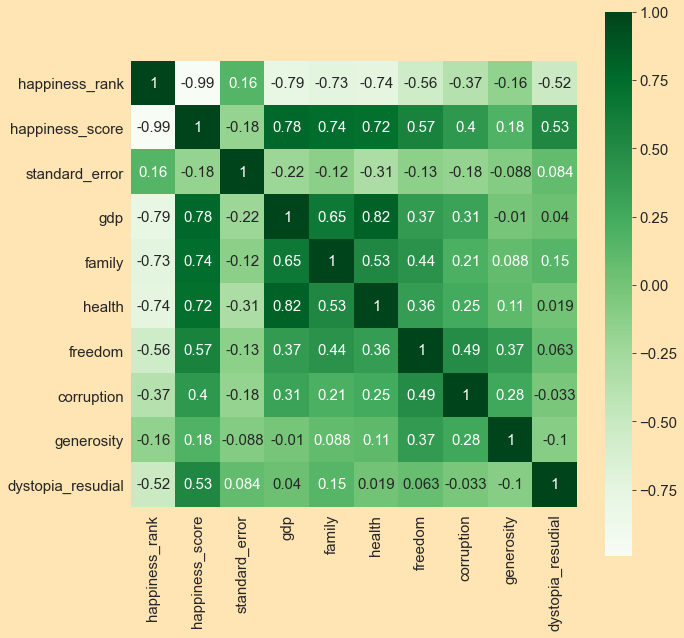

In [123]:
corruption= data.groupby("region")[["corruption"]].mean().sort_values("corruption",ascending=False)
corruption

,corruption
region,
Australia and New Zealand,0.392795
North America,0.244235
Western Europe,0.231463
Middle East and Northern Africa,0.181702
Southeastern Asia,0.151276
Eastern Asia,0.127695
Sub-Saharan Africa,0.123878
Latin America and Caribbean,0.117172
Southern Asia,0.102536


<BarContainer object of 10 artists>

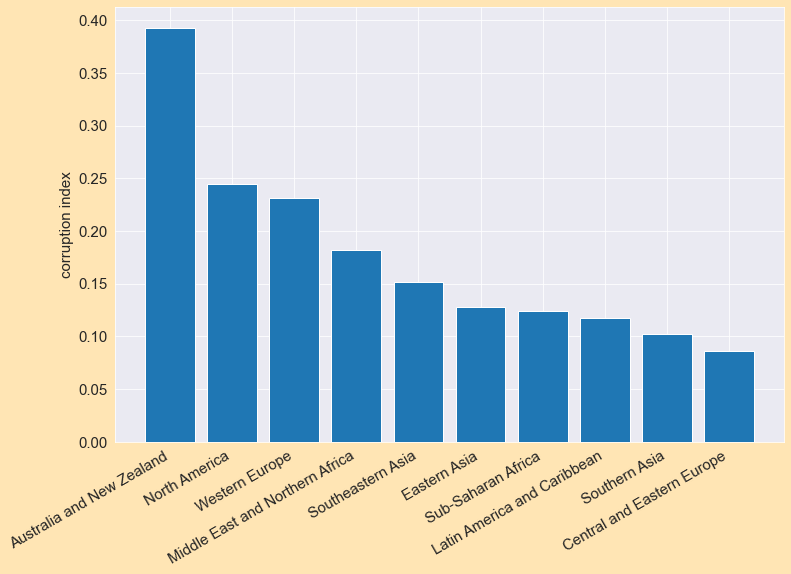

In [129]:
plt.rcParams["figure.figsize"]=(12,8)
plt.xlabel=("region")
plt.ylabel("corruption index",fontsize=15)
plt.xticks(rotation=30,ha="right")
plt.bar(corruption.index,corruption.corruption)

In [136]:
top_10=data.head(10)
bottom_10=data.tail(10)


Text(599.1068181818181, 0.5, 'health')

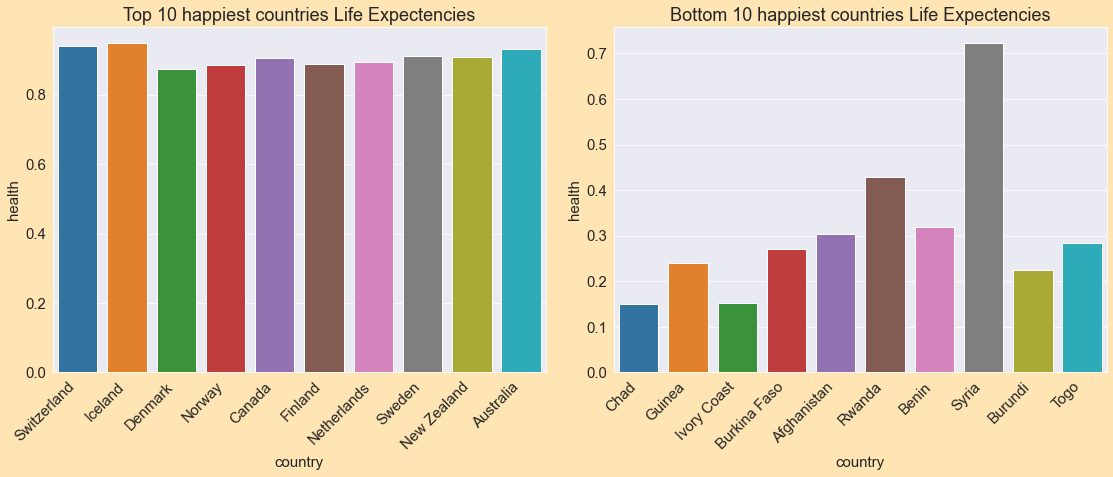

In [137]:
fig, axes=plt.subplots(1,2,figsize=(16,6))
plt.tight_layout(pad=2)
xlabel=top_10.country
axes[0].set_title("Top 10 happiest countries Life Expectencies")
axes[0].set_xticklabels(xlabel,rotation=45,ha="right")
sns.barplot(x=top_10.country, y=top_10.health,ax=axes[0])
axes[0].set_xlabel("country")
axes[0].set_ylabel("health")


xlabel=bottom_10.country
axes[1].set_title("Bottom 10 happiest countries Life Expectencies")
axes[1].set_xticklabels(xlabel,rotation=45,ha="right")
sns.barplot(x=bottom_10.country, y=bottom_10.health,ax=axes[1])
axes[1].set_xlabel("country")
axes[1].set_ylabel("health")


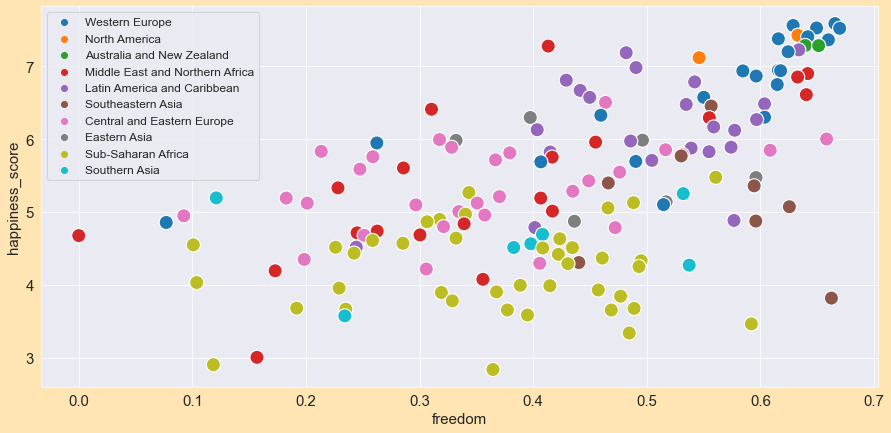

In [149]:
plt.rcParams["figure.figsize"]=(15,7)
sns.scatterplot(x=data.freedom,y=data.happiness_score,hue=data.region,s = 200)
plt.legend(loc="upper left",fontsize= "12")


<BarContainer object of 10 artists>

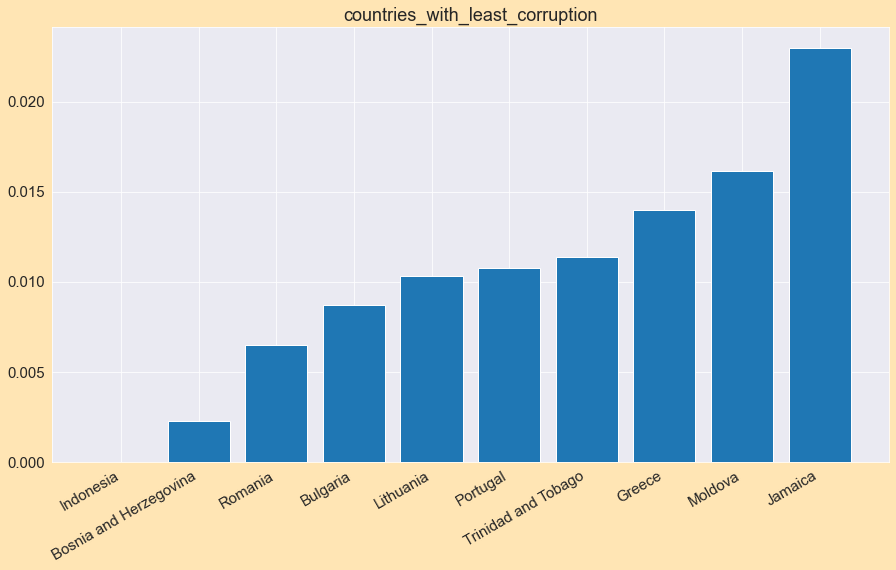

In [166]:
country=data.sort_values(by="corruption").head(10)
plt.rcParams["figure.figsize"]=(15,8)
plt.title("countries_with_least_corruption")
plt.xticks(rotation=30,ha="right")
plt.bar(country.country,country.corruption)

<BarContainer object of 10 artists>

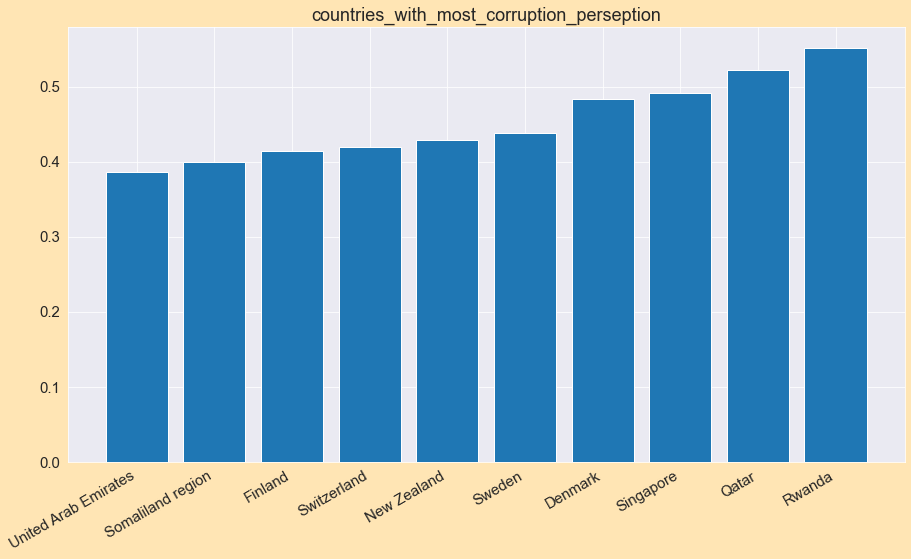

In [167]:
country=data.sort_values(by="corruption").tail(10)
plt.rcParams["figure.figsize"]=(15,8)
plt.title("countries_with_most_corruption_perseption")
plt.xticks(rotation=30,ha="right")
plt.bar(country.country,country.corruption)

<AxesSubplot:>

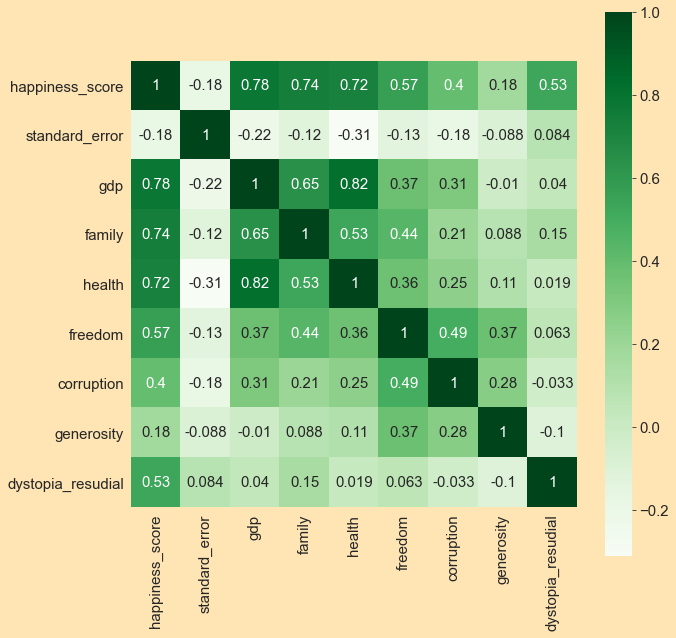

In [172]:
cor=data.corr(method="pearson")
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(cor,annot=True,mask=np.zeros_like(cor,dtype=np.bool),
    cmap="Greens",square=True,ax=ax)

In [183]:
data.drop(["happiness_rank","region",],axis=1,inplace=True)

KeyError: "['happiness_rank' 'region'] not found in axis"

In [184]:
data.drop(["country"],axis=1,inplace=True)

In [174]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [185]:
y=data["happiness_score"]
X=data.drop("happiness_score",axis=1)

In [186]:
scaler=MinMaxScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [189]:
X.drop(["standard_error"],axis=1,inplace=True)

In [190]:
X

,gdp,family,health,freedom,corruption,generosity,dystopia_resudial
0,0.826132,0.962403,0.918244,0.993789,0.760595,0.372895,0.668630
1,0.770412,1.000000,0.924496,0.938841,0.256292,0.548198,0.725030
2,0.784113,0.970297,0.853099,0.969615,0.876175,0.428947,0.660889
3,0.863099,0.949167,0.863409,1.000000,0.661394,0.435983,0.652724
4,0.784592,0.943219,0.883326,0.945112,0.597144,0.575602,0.648584
...,...,...,...,...,...,...,...
153,0.131376,0.551764,0.418083,0.883953,1.000000,0.284314,0.104425
154,0.169573,0.252355,0.311241,0.723426,0.145132,0.229432,0.398557
155,0.392329,0.338668,0.704150,0.234184,0.342556,0.592790,0.000000
156,0.009051,0.296578,0.218444,0.176937,0.182312,0.247864,0.459573


In [200]:
X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.75)

In [201]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [202]:
print(f'Regression R2:{model.score(X_test,y_test)}')

Regression R2:0.9999999339864561
